In [75]:
import numpy as np
import matplotlib.pyplot as plt

from fealpy.mesh import TriangleMesh
from domain_2d import RectangleDomain

bdy: [-0.4, 0.4, -0.25, 0.25]
tes: 0.5


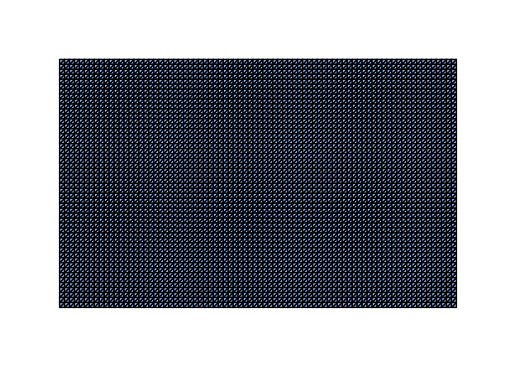

In [76]:
# 区域划分的单元数
nx = 80
ny = 50
# 设计区域的边界
bdy = [-0.5*nx/100, 0.5*nx/100, -0.5*ny/100, 0.5*ny/100]
print("bdy:", bdy)

mesh1 = TriangleMesh.from_box(box=bdy, nx=nx, ny=ny)

node = mesh1.entity('node')
pi = node.copy()
pi[1::2, 0] += 0.005
#print("pi:", pi.shape, "\n", pi)
print("tes:", bdy[3]-bdy[2])
dN = np.sin(6*np.pi*2*node[:, 0]/(bdy[1]-bdy[0])) * np.cos(6*np.pi*2*node[:, 1]/(bdy[1]-bdy[0])) + 0.5



fig, ax = plt.subplots()
mesh1.add_plot(ax)
plt.show()


xn (51, 81) 
 [[-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]
 [-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]
 [-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]
 ...
 [-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]
 [-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]
 [-0.4  -0.39 -0.38 ...  0.38  0.39  0.4 ]]
yn (51, 81) 
 [[-0.25 -0.25 -0.25 ... -0.25 -0.25 -0.25]
 [-0.24 -0.24 -0.24 ... -0.24 -0.24 -0.24]
 [-0.23 -0.23 -0.23 ... -0.23 -0.23 -0.23]
 ...
 [ 0.23  0.23  0.23 ...  0.23  0.23  0.23]
 [ 0.24  0.24  0.24 ...  0.24  0.24  0.24]
 [ 0.25  0.25  0.25 ...  0.25  0.25  0.25]]
dN: (51, 81) 
 [[ 0.5         0.82101976  1.0720614  ... -0.0720614   0.17898024
   0.5       ]
 [ 0.5         0.64029078  0.75       ...  0.25        0.35970922
   0.5       ]
 [ 0.5         0.42898024  0.37344186 ...  0.62655814  0.57101976
   0.5       ]
 ...
 [ 0.5         0.42898024  0.37344186 ...  0.62655814  0.57101976
   0.5       ]
 [ 0.5         0.64029078  0.75       ...  0.25        0.35970922
   0.5       ]
 [ 0.5         0.82

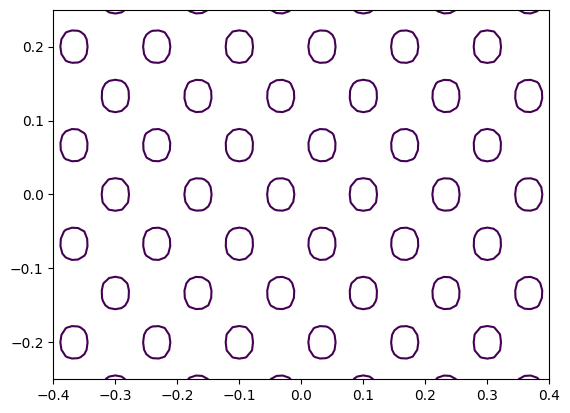

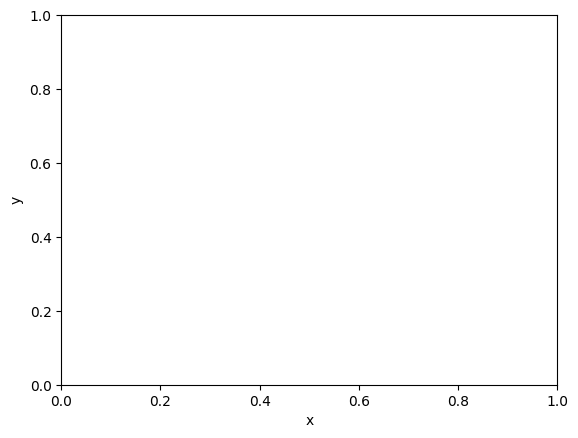

In [77]:
# 将节点和密度值重塑为二维网格
xn = node[:, 0].reshape(nx+1, ny+1).T
print("xn", xn.shape, "\n", xn)
yn = node[:, 1].reshape(nx+1, ny+1).T
print("yn", yn.shape, "\n", yn)
dN = dN.reshape(nx+1, ny+1).T
print("dN:", dN.shape, "\n", dN)

# 生成等高线图，并找到零水平集的点
contour = plt.contour(xn, yn, dN, levels=[0])
#paths = contour.collections[0].get_paths()

# 提取等高线上的点
#zero_level_set = np.vstack([path.vertices for path in paths])

# 可视化零水平集
plt.figure()
# plt.plot(zero_level_set[:, 0], zero_level_set[:, 1], 'r-')
# plt.scatter(node[:, 0], node[:, 1], c=dN, cmap='viridis', s=1)
# plt.colorbar(label='Density')
# plt.title('Zero Level Set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


NC: 1287
NN: 697


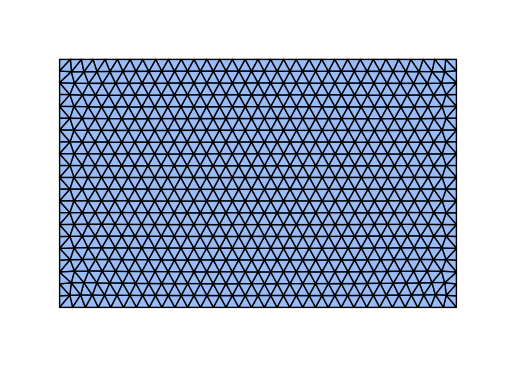

In [78]:
bdy = [-0.5*nx/100, 0.5*nx/100, -0.5*ny/100, 0.5*ny/100]
hmin = 0.025
hmax = 0.2
domain = RectangleDomain(domain=bdy, hmin=hmin, hmax=hmax)
maxiter = 1000
mesh = TriangleMesh.from_domain_distmesh(domain, maxit=maxiter)
NC = mesh.number_of_cells()
print("NC:", NC)
NN = mesh.number_of_nodes()
print("NN:", NN)

fig, ax = plt.subplots()
mesh.add_plot(ax)
plt.show()